[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]


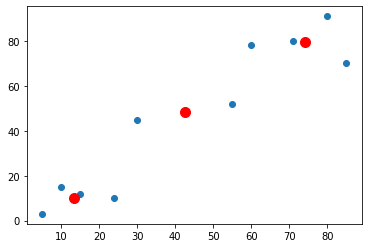

In [14]:
# 1
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])

plt.scatter(X[:,0],X[:,1])

kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(X)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:,0],centers[:,1],c="red",s=100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


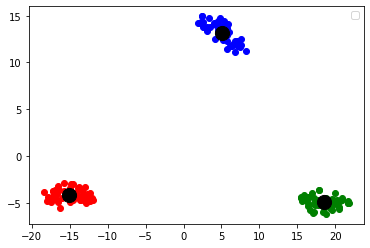

In [28]:
# 2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import seaborn

data = seaborn.load_dataset("iris")

kmeans = KMeans(n_clusters=3, n_init="auto")

species = ['setosa', 'versicolor', 'virginica']

for s in species:
    data[s] = [1 if s==x else 0 for x in data["species"] ]
data = data.drop("species", axis = 1)
df = TSNE(n_components = 2).fit_transform(data)
kmeans.fit(df)

centers = kmeans.cluster_centers_
cmap = {
    'setosa' : "red", 
    'versicolor' : "green", 
    'virginica' : "blue"
}

for i in range(len(data)):
    specie = [x for x in species if data[x][i] == 1][0]
    plt.scatter(df[i][0],df[i][1], c = cmap[specie])

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200)


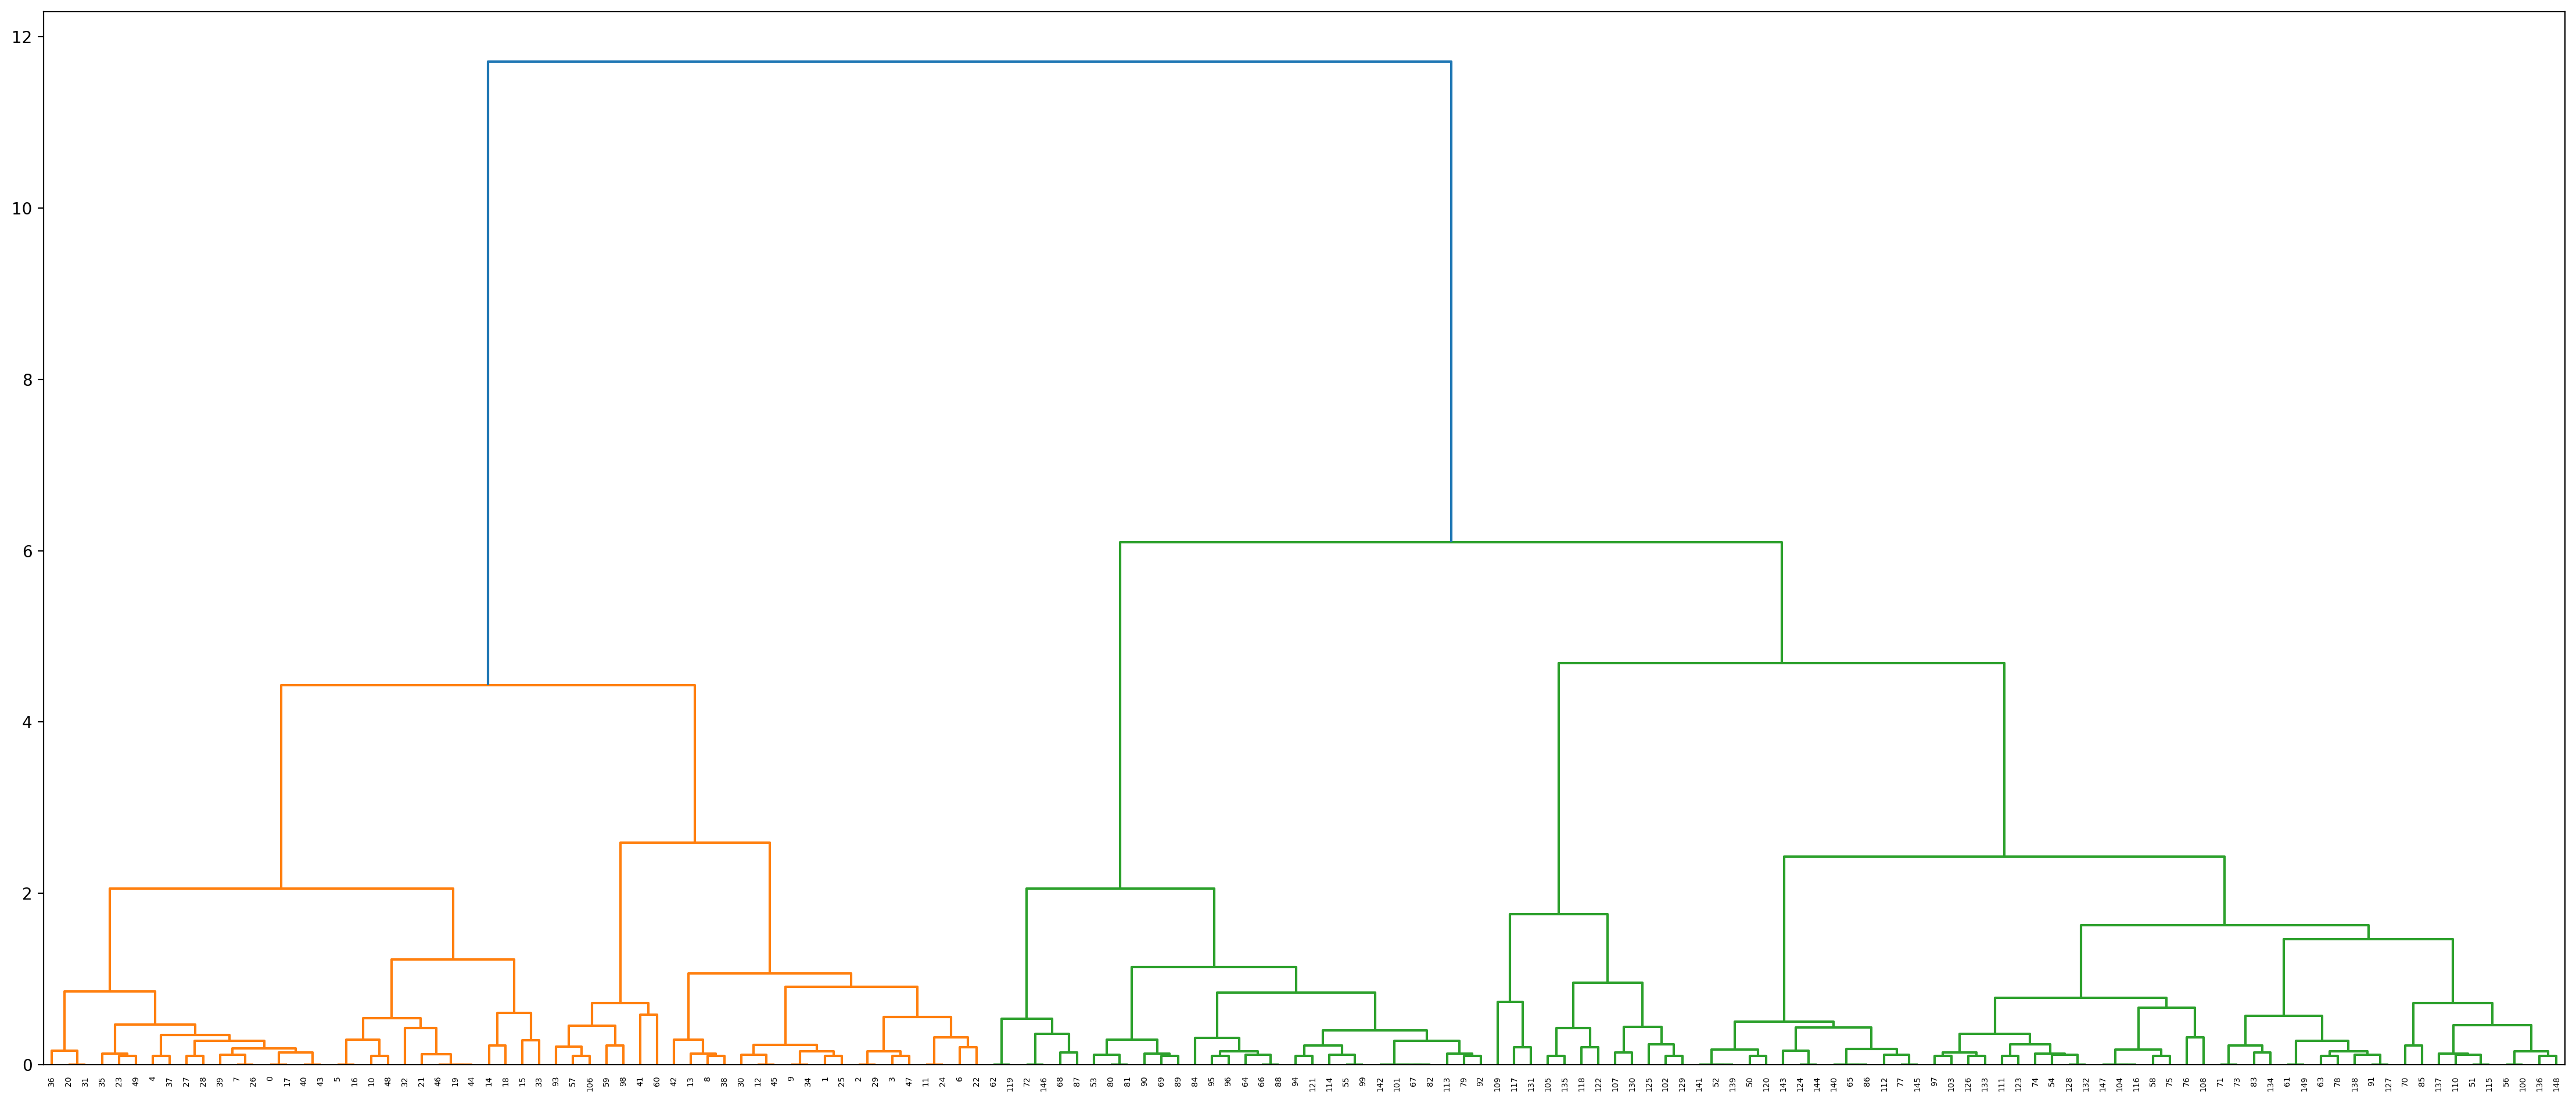

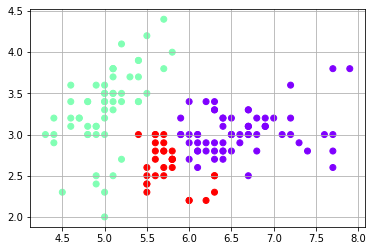

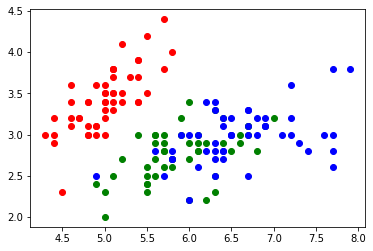

In [30]:
# 3

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import seaborn

def buildDen(data):
    plt.figure(figsize = (28,12), dpi = 200)
    shc.dendrogram(shc.linkage(df, method = "ward"))
    plt.show()

def buildClusterizedData(data):
    cluster = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage="ward")
    cluster.fit_predict(df)

    plt.scatter(df["sepal_length"],df["sepal_width"], c = cluster.labels_, cmap = "rainbow")
    plt.grid()
    plt.show()

def buildOriginalData(data):
    cmap = {
    'setosa' : "red", 
    'versicolor' : "green", 
    'virginica' : "blue"
    }

    for i in range(len(data)):
        plt.scatter(df["sepal_length"][i],df["sepal_width"][i], c = cmap[data["species"][i]])

    plt.show()


data = seaborn.load_dataset("iris")

df = data[["sepal_length", "sepal_width"]]

buildDen(data)
buildClusterizedData(data)
buildOriginalData(data)
